## Exercise 01 : Line chart with styles

In [11]:
import pandas as pd
import sqlite3


database_file = "../data/checking-logs.sqlite"

In [12]:
connection_obj = sqlite3.connect(database_file)

* analyze only the users and not the admins
* analyze only the dates when there were both views and checker commits
* use size of the font should be 8
* the size of the figure is (15,8)

In [13]:
query = """
    WITH commits_data AS (
        SELECT 
            DATE(timestamp) AS commit_date,
            COUNT(*) AS commits
        FROM checker
        WHERE uid LIKE 'user_%'
        GROUP BY commit_date
    ),
    pageviews_data AS (
        SELECT 
            DATE(datetime) AS pageview_date, 
            COUNT(*) AS views
        FROM pageviews
        WHERE uid LIKE 'user_%'
        GROUP BY pageview_date
    )
    SELECT
        c.commit_date AS date,
        p.views,
        c.commits
    FROM commits_data c
    JOIN pageviews_data p ON c.commit_date = p.pageview_date
    ORDER BY date;
"""
df = pd.read_sql(query, connection_obj, index_col="date")
df

,views,commits
date,,
2020-04-17,1,23
2020-04-18,23,69
2020-04-19,15,33
2020-04-21,3,25
2020-04-22,1,28
2020-04-23,5,43
2020-04-25,1,104
2020-04-26,8,261
2020-04-28,2,5


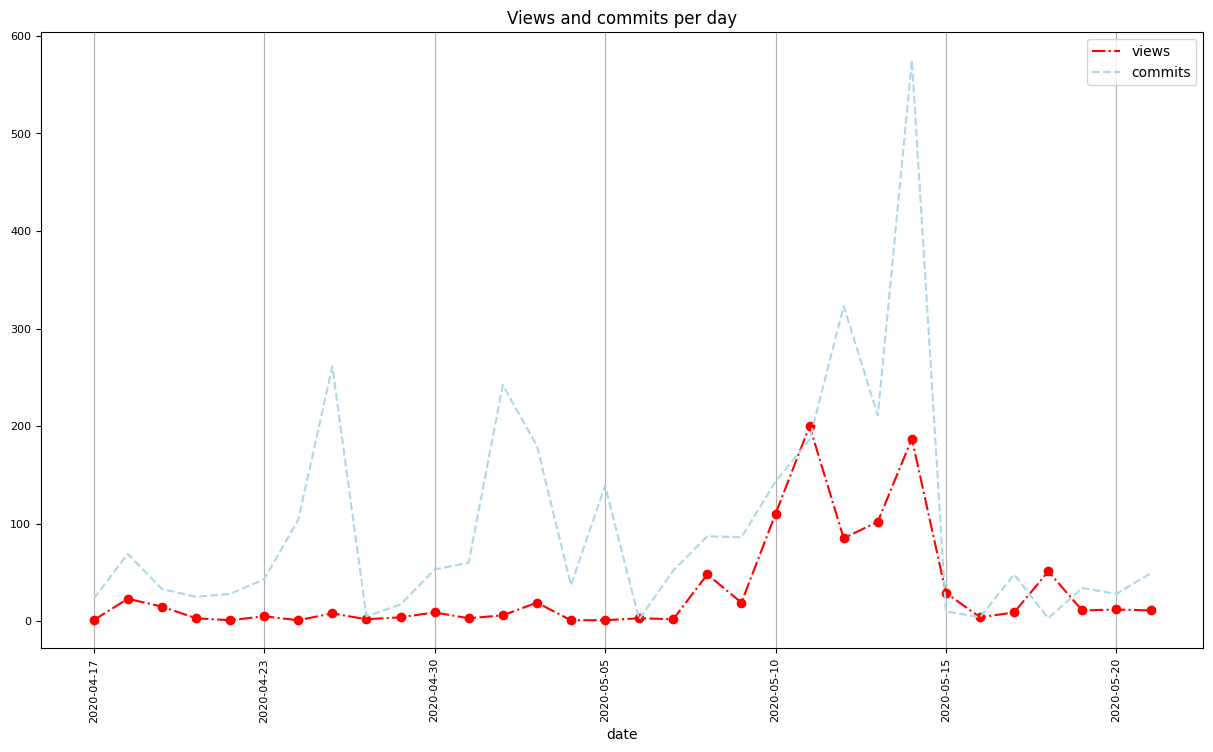

In [14]:
plot = df.plot(
    title="Views and commits per day",
    fontsize=8,
    figsize=(15, 8),
    rot=90,
    color=["red", "lightblue"],
    style=["-.", "--"],
)

lines = plot.get_lines()
lines[0].set_marker("o")

plot.grid(axis="x")

In [15]:
connection_obj.close()

* at the end of your Jupyter Notebook create a markdown cell and insert the question:
“How many times was the number of views larger than 150?” Insert: “The answer
is ___”. Put the number in the text instead of the underline.

The answer is 2